In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import basicDeltaOperations as op
import seaborn as sns
import json
from scipy import stats

In [ ]:
with open('120k_Data.json') as f:
    neg120k = json.load(f)

with open('EA_IRMS_Data.json') as f:
    EAData = json.load(f)

In [ ]:
neg120k

{'A': {'13C/Unsub': {'Raw Ratios': [0.0101706462239838,
    0.010378080781841813,
    0.01016285688957146,
    0.010355807011876378,
    0.01017526871420479,
    0.010377655084814466,
    0.010161874442892104],
   'Raw RSE': [0.0006720800264374392,
    0.0006530505184142803,
    0.0006809744878050815,
    0.0006769898960269975,
    0.0006707409109234081,
    0.0007093778586635161,
    0.0007221363076104928],
   'Ratios': [1.020555393361028, 1.018504298452627, 1.0207926647370082],
   'RSEs': [0.0008208758069461639,
    0.0007718654675815795,
    0.0008664377611192474],
   'Deltas': [20.555393361028074, 18.504298452626912, 20.79266473700825],
   'DeltasErr': [0.8208758069461638, 0.7718654675815795, 0.8664377611192474],
   'Delta Mean': 19.950785516887745,
   'ER': 1.0273973742002402},
  'D/Unsub': {'Raw Ratios': [0.000509904932710382,
    0.0005196423414788748,
    0.0005099124297956712,
    0.0005228999908382372,
    0.000507710971671014,
    0.0005198162489241365,
    0.000506271914071

In [ ]:
def compare13CDeltas(delta1, delta2):
    ratio1 = (delta1 / 1000 + 1) * 0.011118
    ratio2 = (delta2 / 1000 + 1) * 0.011118

    return 1000 * (ratio1 / ratio2 - 1)

Text(0, 0.5, 'Caltech Results $\\delta^{13C}_{PDB}$')

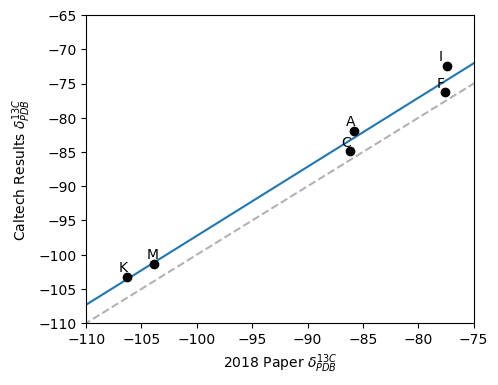

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Moran et al']
yDict = EAData['Weighing 2023']
fig, ax = plt.subplots(figsize = (5,4), dpi =100)

for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(yDict[MPAKey]['13C/Unsub']['Delta VPDB'])
        yerr.append(yDict[MPAKey]['13C/Unsub']['Error'])

        ax.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75, yDict[MPAKey]['13C/Unsub']['Delta VPDB'] + 0.75, MPAKey[-1])

ax.errorbar(xs, ys, xerr = xerr, yerr = yerr, fmt = 'o', c = 'k')


ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-75)
ax.set_ylim(-110,-65)

coef = np.polyfit(xs,ys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,100)

ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('2018 Paper $\delta^{13C}_{PDB}$')
ax.set_ylabel("Caltech Results $\delta^{13C}_{PDB}$")

Text(0, 0.5, 'Orbi-IRMS $\\delta^{13C}_{VPDB}$')

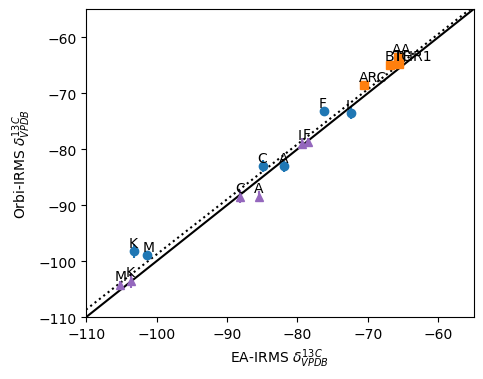

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Solvent 2022']
yDict = neg120k
fig, ax = plt.subplots(figsize = (5,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

for xIdx, xDict in enumerate([EAData['Solvent 2022'], EAData['Weighing 2023']]):
        for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
                if MPAKey not in ['SIG']:
                        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
                        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
                        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

                        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

                        if MPAKey in expSamples:
                                fmt = 'o'
                                c = 'tab:blue'
                        else:
                                fmt = 's'
                                c = 'tab:orange'

                        if xIdx == 0:
                                fmt = '^'
                                c = 'tab:purple'

                        ax.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

                        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
                        xerr.append(MPAData['13C/Unsub']['Error'])
                        ys.append(deltaOrbiVPDB)
                        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

                        ax.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)


#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-55)
ax.set_ylim(-110,-55)

coef = np.polyfit(xs,ys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,100)

ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
ax.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
ax.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

In [ ]:
neg120k.keys()

dict_keys(['A', 'F', 'K', 'I', 'M', 'C', 'ARC', 'BTC', 'THR1', 'AA'])

In [ ]:
yDict

{'A': {'13C/Unsub': {'Raw Ratios': [0.0101706462239838,
    0.010378080781841813,
    0.01016285688957146,
    0.010355807011876378,
    0.01017526871420479,
    0.010377655084814466,
    0.010161874442892104],
   'Raw RSE': [0.0006720800264374392,
    0.0006530505184142803,
    0.0006809744878050815,
    0.0006769898960269975,
    0.0006707409109234081,
    0.0007093778586635161,
    0.0007221363076104928],
   'Ratios': [1.020555393361028, 1.018504298452627, 1.0207926647370082],
   'RSEs': [0.0008208758069461639,
    0.0007718654675815795,
    0.0008664377611192474],
   'Deltas': [20.555393361028074, 18.504298452626912, 20.79266473700825],
   'DeltasErr': [0.8208758069461638, 0.7718654675815795, 0.8664377611192474],
   'Delta Mean': 19.950785516887745,
   'ER': 1.0273973742002402},
  'D/Unsub': {'Raw Ratios': [0.000509904932710382,
    0.0005196423414788748,
    0.0005099124297956712,
    0.0005228999908382372,
    0.000507710971671014,
    0.0005198162489241365,
    0.000506271914071

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


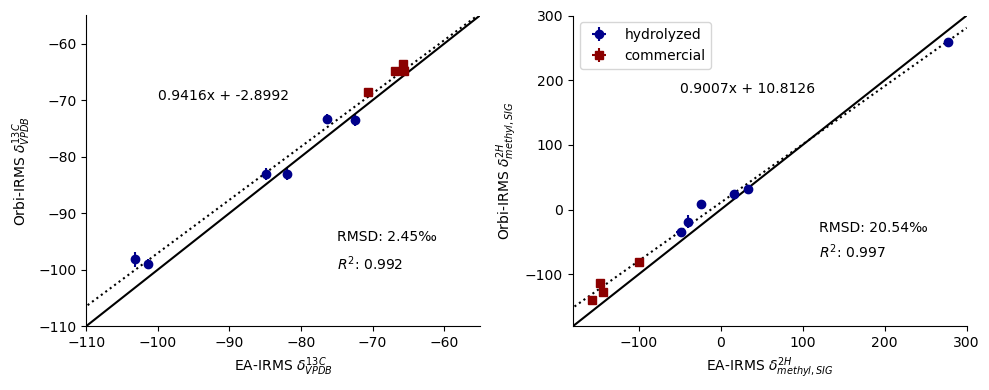

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Weighing 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[0]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        crossPlot[MPAKey] = {'13C':[],'13CErr':[],'2H':[],'2HErr':[]}
        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(deltaOrbiVPDB)
        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

        crossPlot[MPAKey]['13C'] = deltaOrbiVPDB
        crossPlot[MPAKey]['13CErr'] = yDict[MPAKey]['13C/Unsub']['ER']

        #cAx.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-110,-55)
cAx.set_ylim(-110,-55)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,100)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(ys) - np.array(xs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(-75, -95, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(-75, -100, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-100, -70, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

cAx = axes[1]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 4/3 * deltaOrbi
        deltaOrbiErrScaled = 4/3 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
                label = 'hydrolyzed'
        else:
                fmt = 's'
                c = 'darkred'
                label = 'commercial'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c, label = label)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

        crossPlot[MPAKey]['2H'] = deltaOrbiScaled
        crossPlot[MPAKey]['2HErr'] = deltaOrbiErrScaled

        #cAx.text(deltaEAScaled -0.75,deltaOrbiScaled + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-180,300)
cAx.set_ylim(-180,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, -35, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-75, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

handles, labels = cAx.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cAx.legend(by_label.values(), by_label.keys())

plt.tight_layout()
sns.despine()

fig.savefig('Figure 3.eps')

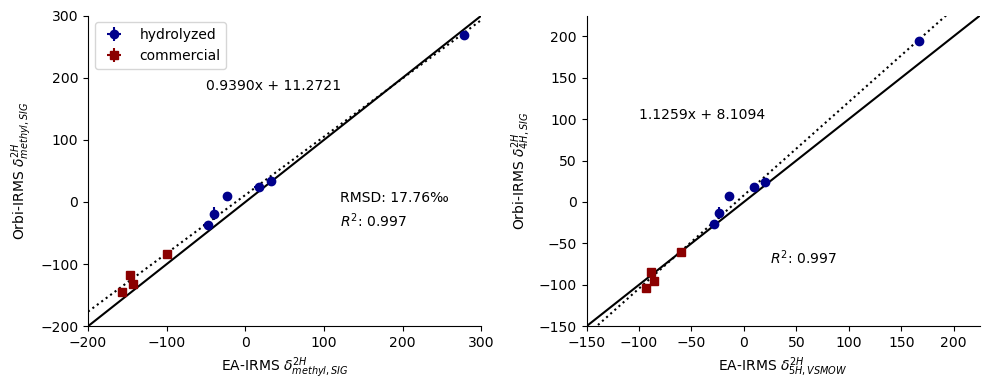

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['UNM 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[1]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = deltaOrbi
        deltaOrbiErrScaled = deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled =  deltaEAvsSIG
        deltaEAErrScaled =  deltaEAVSMOWErr
        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c)

        xs.append(deltaEAScaled)
        xerr.append(deltaEAErrScaled)
        ys.append(deltaOrbiScaled)
        yerr.append(deltaOrbiErrScaled)

cAx.set_xlim(-150,225)
cAx.set_ylim(-150,225)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-300,225)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-300,225], [-300,225], color = 'k',linestyle = '-')

cAx.text(25, -75, '$R^{2}$: ' + f'{r_value:.3f}')
cAx.text(-100, 100, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{5H, VSMOW}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{4H, SIG}$")

cAx = axes[0]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 1.39 * deltaOrbi
        deltaOrbiErrScaled = 1.39 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
                label = 'hydrolyzed'
        else:
                fmt = 's'
                c = 'darkred'
                label = 'commercial'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c, label = label)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-200,300)
cAx.set_ylim(-200,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, 0, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-40, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

handles, labels = cAx.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cAx.legend(by_label.values(), by_label.keys())

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

plt.tight_layout()
sns.despine()

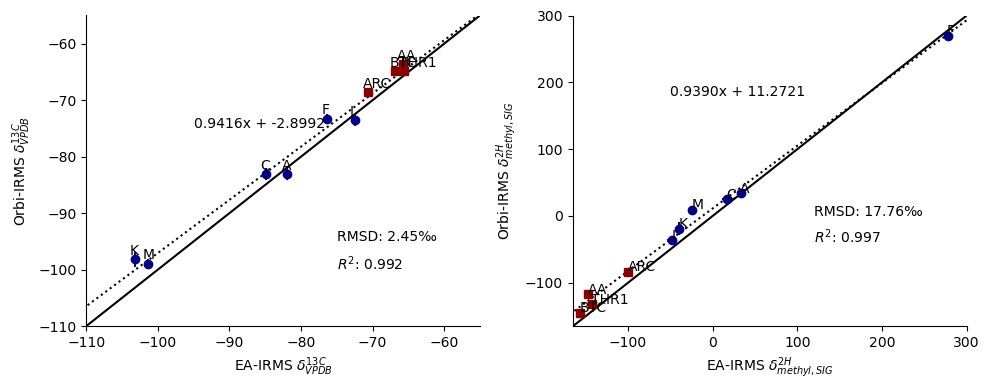

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Weighing 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[0]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        crossPlot[MPAKey] = {'13C':[],'13CErr':[],'2H':[],'2HErr':[]}
        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(deltaOrbiVPDB)
        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

        crossPlot[MPAKey]['13C'] = deltaOrbiVPDB
        crossPlot[MPAKey]['13CErr'] = yDict[MPAKey]['13C/Unsub']['ER']

        cAx.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-110,-55)
cAx.set_ylim(-110,-55)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,100)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(ys) - np.array(xs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(-75, -95, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(-75, -100, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-95, -75, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

cAx = axes[1]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 1.39 * deltaOrbi
        deltaOrbiErrScaled = 1.39 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

        crossPlot[MPAKey]['2H'] = deltaOrbiScaled
        crossPlot[MPAKey]['2HErr'] = deltaOrbiErrScaled

        cAx.text(deltaEAScaled -0.75,deltaOrbiScaled + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-165,300)
cAx.set_ylim(-165,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, 0, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-40, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

plt.tight_layout()
sns.despine()

In [ ]:
EAData['UNM 2023']['SIG']

{'D/Unsub': {'Delta VSMOW': -159.4, 'Error': 2.6}}

A
F
K
I
M
C
ARC
BTC
AA
THR1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


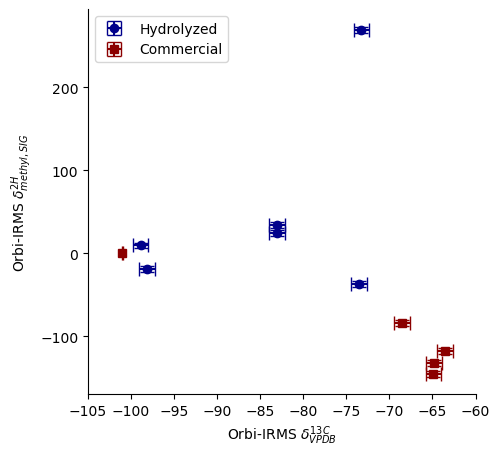

In [ ]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})

fig, ax = plt.subplots(figsize = (5,5))

for MPAKey, MPAData in crossPlot.items():
    print(MPAKey)
    if MPAKey in expSamples:
        fmt = 'o'
        c = 'darkblue'
        label = 'Hydrolyzed'
    else:
        fmt = 's'
        c = 'darkred'
        label = 'Commercial'

    ax.errorbar(MPAData['13C'],MPAData['2H'], xerr = 0.9,yerr = 3.6, mfc = c, fmt = fmt, mec = c, ecolor = c, capsize = 5, label = label)

    #ax.text(MPAData['13C']+1, MPAData['2H']+5, MPAKey)

#c = 'darkgoldenrod'
#ax.errorbar(EAData['Weighing 2023']['SIG']['13C/Unsub']['Delta VPDB'], 0, xerr = EAData['Weighing 2023']['SIG']['13C/Unsub']['Error'], yerr = 0, mfc = 'w', mec = c, ecolor = c, label = "Sigma Standard", fmt = '^', capsize = 0,markeredgewidth = 1)
ax.errorbar(EAData['Weighing 2023']['SIG']['13C/Unsub']['Delta VPDB'], 0, xerr = EAData['Weighing 2023']['SIG']['13C/Unsub']['Error'], mfc = 'darkred', mec = 'darkred', capsize = 5, ecolor = 'darkred', fmt = 's')
    
sns.despine()

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

ax.set_xlabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")
ax.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")
ax.set_xlim(-105,-60)

fig.savefig("Figure 4.eps", bbox_inches = 'tight')

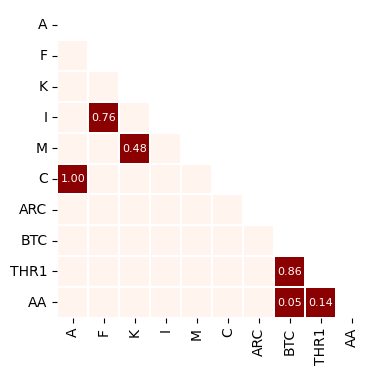

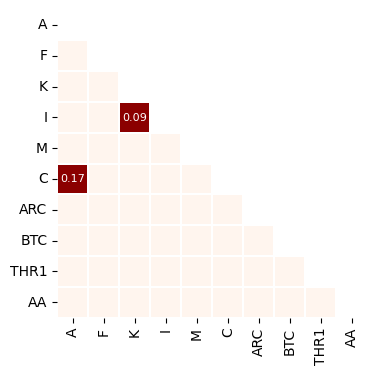

In [ ]:
import pandas as pd
import scipy

for plotIdx, ratio in enumerate(['13C/Unsub','D/Unsub']):
    fig, cAx = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))
    p_values = np.zeros((10, 10))

    for idx_i, (key_i, value_i) in enumerate(neg120k.items()):
        for idx_j, (key_j, value_j) in enumerate(neg120k.items()):
            if idx_i != idx_j:  # Avoid comparing a list to itself
                deltas_i = value_i[ratio]['Deltas']
                deltas_j = value_j[ratio]['Deltas']

                _, p_value = scipy.stats.f_oneway(deltas_i, deltas_j)
                p_values[idx_i, idx_j] = p_value

    np.fill_diagonal(p_values, np.nan)
    p_values[np.triu_indices_from(p_values, k=1)] = np.nan 

    # Create a DataFrame for the p-values
    columns = list(neg120k.keys())
    index = list(neg120k.keys())
    p_values_df = pd.DataFrame(p_values, columns=columns, index=index)

    # Define color thresholds and corresponding colors
    bounds = [0, 0.05, 1]
    colors = ['seashell', 'darkred'] 

    # Create a colormap with the specified colors and bounds
    cmap_custom = plt.cm.colors.ListedColormap(colors)
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap_custom.N)

    mask = np.triu(np.ones_like(p_values_df, dtype=bool), k=1)
    # Visualize p-values as a heatmap
    heatmap = sns.heatmap(p_values_df, ax =cAx, annot=False, cmap=cmap_custom, cbar = False, linewidths=0.1, linecolor='w',norm = norm, fmt=".2f", mask = mask)

    # Conditionally annotate cells with values above 0.05
    pArr = np.array(p_values_df)
    for i in range(pArr.shape[1]):
        for j in range(0,i+1):
            if pArr[i][j] > 0.05:
                heatmap.text(j + 0.5, i + 0.5, f'{pArr[i, j]:.2f}', ha='center', va='center', color='w', fontsize = 8)

    #cAx.set_title('Pairwise ANOVA P-Values: ' + ratio)

    fig.savefig("Figure 5_" + str(plotIdx) + ".eps", bbox_inches = 'tight')

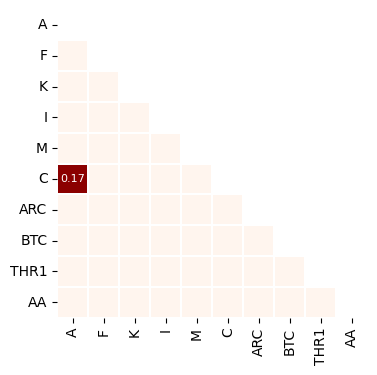

In [ ]:
import pandas as pd
import copy

fig, cAx = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))

storeDf = {}
for plotIdx, ratio in enumerate(['13C/Unsub','D/Unsub']):
    p_values = np.zeros((10, 10))

    for idx_i, (key_i, value_i) in enumerate(neg120k.items()):
        for idx_j, (key_j, value_j) in enumerate(neg120k.items()):
            if idx_i != idx_j:  # Avoid comparing a list to itself
                deltas_i = value_i[ratio]['Deltas']
                deltas_j = value_j[ratio]['Deltas']

                _, p_value = scipy.stats.f_oneway(deltas_i, deltas_j)
                p_values[idx_i, idx_j] = p_value

    np.fill_diagonal(p_values, np.nan)
    p_values[np.triu_indices_from(p_values, k=1)] = np.nan 

    # Create a DataFrame for the p-values
    columns = list(neg120k.keys())
    index = list(neg120k.keys())
    storeDf[ratio] = copy.deepcopy(p_values)

p_values_df = pd.DataFrame(np.minimum(storeDf['13C/Unsub'],storeDf['D/Unsub']), columns=columns, index=index)
# Define color thresholds and corresponding colors
bounds = [0, 0.025, 1]
colors = ['seashell', 'darkred'] 

# Create a colormap with the specified colors and bounds
cmap_custom = plt.cm.colors.ListedColormap(colors)
norm = plt.cm.colors.BoundaryNorm(bounds, cmap_custom.N)

mask = np.triu(np.ones_like(p_values_df, dtype=bool), k=1)
# Visualize p-values as a heatmap
heatmap = sns.heatmap(p_values_df, ax =cAx, annot=False, cmap=cmap_custom, cbar = False, linewidths=0.1, linecolor='w',norm = norm, fmt=".2f", mask = mask)

# Conditionally annotate cells with values above 0.025
pArr = np.array(p_values_df)
for i in range(pArr.shape[1]):
    for j in range(0,i+1):
        if pArr[i][j] > 0.025:
            heatmap.text(j + 0.5, i + 0.5, f'{pArr[i, j]:.2f}', ha='center', va='center', color='w', fontsize = 8)

    #cAx.set_title('Pairwise ANOVA P-Values: ' + ratio)

fig.savefig("Figure 5_" + str(2) + ".eps", bbox_inches = 'tight')

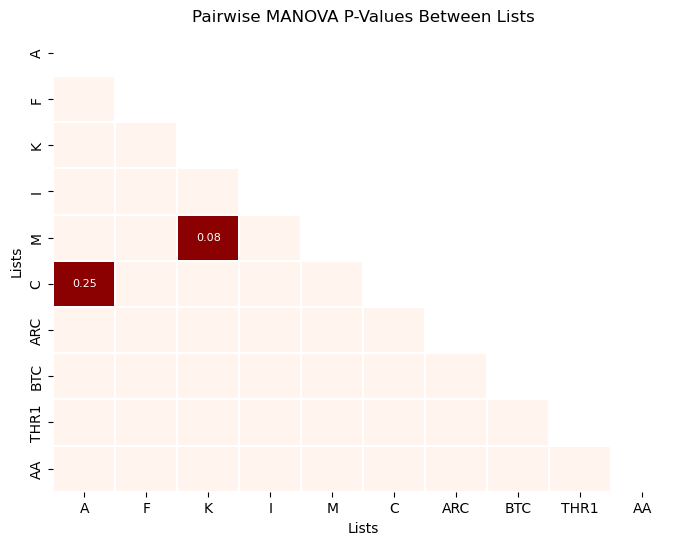

In [ ]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

p_values = np.zeros((10, 10))

for idx_i, (key_i, value_i) in enumerate(neg120k.items()):
    for idx_j, (key_j, value_j) in enumerate(neg120k.items()):
        if idx_i != idx_j and idx_i != 9 and idx_j != 9:  # Avoid comparing a list to itself
            delta13C_i = value_i['13C/Unsub']['Deltas']
            delta13C_j = value_j['13C/Unsub']['Deltas']
            deltaD_i = value_i['D/Unsub']['Deltas']
            deltaD_j = value_j['D/Unsub']['Deltas']

            totalDelta13C = delta13C_i + delta13C_j
            totalDeltaD = deltaD_i + deltaD_j

            df = pd.DataFrame([totalDelta13C, totalDeltaD]).T
            df.columns = ['Carbon','Hydrogen']
            df['Names'] = ['0'] * len(delta13C_i) + ['1'] * len(delta13C_j)

            manova = MANOVA.from_formula('Carbon + Hydrogen ~ Names',df)

            pval = manova.mv_test()['Names']['stat']['Pr > F'][0]
            
            p_values[idx_i, idx_j] = pval

np.fill_diagonal(p_values, np.nan)
p_values[np.triu_indices_from(p_values, k=1)] = np.nan 

# Create a DataFrame for the p-values
columns = list(neg120k.keys())
index = list(neg120k.keys())
p_values_df = pd.DataFrame(p_values, columns=columns, index=index)

# Define color thresholds and corresponding colors
bounds = [0, 0.05, 1]
colors = ['seashell', 'darkred'] 

# Create a colormap with the specified colors and bounds
cmap_custom = plt.cm.colors.ListedColormap(colors)
norm = plt.cm.colors.BoundaryNorm(bounds, cmap_custom.N)

mask = np.triu(np.ones_like(p_values_df, dtype=bool), k=1)
# Visualize p-values as a heatmap


# Visualize p-values as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sns.heatmap(p_values_df, ax =ax, annot=False, cmap=cmap_custom, cbar = False, linewidths=0.1, linecolor='w',norm = norm, fmt=".2f", mask = mask)


# Conditionally annotate cells with values above 0.05
pArr = np.array(p_values_df)
for i in range(pArr.shape[1]):
    for j in range(0,i+1):
        if pArr[i][j] > 0.025:
            heatmap.text(j + 0.5, i + 0.5, f'{pArr[i, j]:.2f}', ha='center', va='center', color='w', fontsize = 8)

plt.title('Pairwise MANOVA P-Values Between Lists')
plt.xlabel('Lists')
plt.ylabel('Lists')
plt.show()

In [ ]:


print(manova.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value    Num DF Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda     0.0001 2.0000 3.0000 23557.2758 0.0000
         Pillai's trace     0.9999 2.0000 3.0000 23557.2758 0.0000
 Hotelling-Lawley trace 15704.8505 2.0000 3.0000 23557.2758 0.0000
    Roy's greatest root 15704.8505 2.0000 3.0000 23557.2758 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
           Names            Value   Num DF  Den DF  F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda   0.0379  2.0000  3.0000  38.0679  0.0074
           P

In [ ]:
manova = MANOVA(endog = varArr, exog = namArr)

NameError: name 'varArr' is not defined

In [ ]:
from statsmodels.multivariate.manova import MANOVA

# Define sample datasets
sample_A_X = np.array([[100, 105, 110], [4, 6, 5]]).T  # X values for sample A
sample_B_X = np.array([[2, 10, 2], [6, 4, 5]]).T  # X values for sample B

# Perform MANOVA
manova = MANOVA.from_formula('X1 + X2 ~ group', pd.DataFrame({'X1': np.concatenate([sample_A_X[:, 0], sample_B_X[:, 0]]),
                                                               'X2': np.concatenate([sample_A_X[:, 1], sample_B_X[:, 1]]),
                                                               'group': ['A'] * len(sample_A_X) + ['B'] * len(sample_B_X)}))

print(manova.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0024 2.0000 3.0000 616.7281 0.0001
         Pillai's trace   0.9976 2.0000 3.0000 616.7281 0.0001
 Hotelling-Lawley trace 411.1521 2.0000 3.0000 616.7281 0.0001
    Roy's greatest root 411.1521 2.0000 3.0000 616.7281 0.0001
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         group           Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0060 2.0000 3.0000 250.5097 0.0005
         Pillai's trace   0.9940 2.0000 3.0000 250.5097 0.0005
 Hotelling-

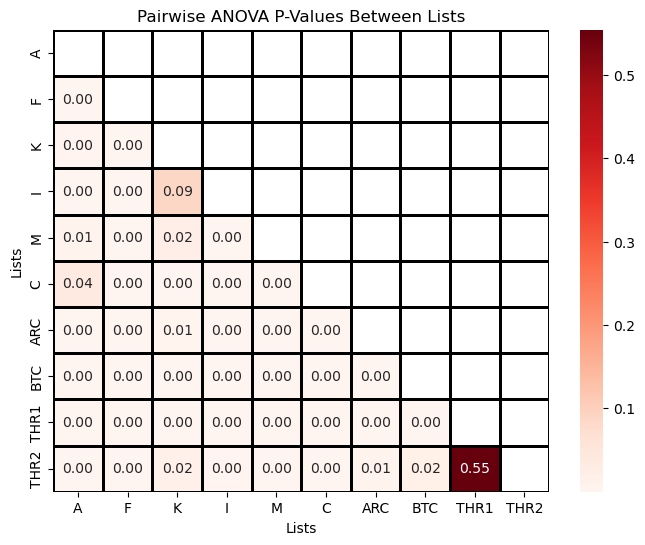

In [ ]:
import pandas as pd

p_values = np.zeros((10, 10))

for idx_i, (key_i, value_i) in enumerate(neg120k.items()):
    for idx_j, (key_j, value_j) in enumerate(neg120k.items()):
        if idx_i != idx_j:  # Avoid comparing a list to itself
            deltas_i = value_i['D/Unsub']['Deltas']
            deltas_j = value_j['D/Unsub']['Deltas']

            _, p_value = scipy.stats.f_oneway(deltas_i, deltas_j)
            p_values[idx_i, idx_j] = p_value

np.fill_diagonal(p_values, np.nan)
p_values[np.triu_indices_from(p_values, k=1)] = np.nan 

# Create a DataFrame for the p-values
columns = list(neg120k.keys())
index = list(neg120k.keys())
p_values_df = pd.DataFrame(p_values, columns=columns, index=index)

# Visualize p-values as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_df, annot=True, cmap='Reds', fmt=".2f", linewidths=1, linecolor = 'k')
plt.title('Pairwise ANOVA P-Values Between Lists')
plt.xlabel('Lists')
plt.ylabel('Lists')
plt.show()

In [ ]:
from statsmodels.multivariate.manova import MANOVA

# Initialize arrays to store multivariate p-values
p_values_MANOVA = np.zeros((10, 10))

# Prepare data arrays for MANOVA
data_X_1 = np.array([neg120k[key]['13C/Unsub']['Deltas'] for key in neg120k])
data_X_2 = np.array([neg120k[key]['D/Unsub']['Deltas'] for key in neg120k])

for idx_i in range(10):
    for idx_j in range(10):
        if idx_i != idx_j:
            # Stack X_1 and X_2 for MANOVA
            combined_data = np.column_stack((data_X_1[idx_i], data_X_2[idx_i], data_X_1[idx_j], data_X_2[idx_j]))
            
            # Perform MANOVA
            manova = MANOVA(combined_data[:, :2], combined_data[:, 2:])
            p_value_MANOVA = manova.mv_test().results['x0']['p-value']
            
            # Store p-value in the matrix
            p_values_MANOVA[idx_i, idx_j] = p_value_MANOVA

# Create a DataFrame for the MANOVA p-values
columns = list(neg120k.keys())
index = list(neg120k.keys())
p_values_MANOVA_df = pd.DataFrame(p_values_MANOVA, columns=columns, index=index)

# Visualize p-values as a heatmap for MANOVA
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_MANOVA_df, annot=True, cmap='coolwarm', fmt=".3f", mask=np.isnan(p_values_MANOVA))
plt.title('Pairwise MANOVA P-Values Between Lists for X_1 and X_2')
plt.xlabel('Lists')
plt.ylabel('Lists')
plt.show()

c:\Users\tacse\Anaconda3\envs\Orbitrap\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys
c:\Users\tacse\Anaconda3\envs\Orbitrap\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


KeyError: 'p-value'

In [ ]:
from statsmodels.multivariate.manova import MANOVA

# Define sample datasets
sample_A_X = np.array([[100, 105, 110], [4, 6, 5]]).T  # X values for sample A
sample_B_X = np.array([[2, 10, 2], [6, 4, 5]]).T  # X values for sample B

# Perform MANOVA
manova = MANOVA.from_formula('X1 + X2 ~ group', pd.DataFrame({'X1': np.concatenate([sample_A_X[:, 0], sample_B_X[:, 0]]),
                                                               'X2': np.concatenate([sample_A_X[:, 1], sample_B_X[:, 1]]),
                                                               'group': ['A'] * len(sample_A_X) + ['B'] * len(sample_B_X)}))

print(manova.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0024 2.0000 3.0000 616.7281 0.0001
         Pillai's trace   0.9976 2.0000 3.0000 616.7281 0.0001
 Hotelling-Lawley trace 411.1521 2.0000 3.0000 616.7281 0.0001
    Roy's greatest root 411.1521 2.0000 3.0000 616.7281 0.0001
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         group           Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0060 2.0000 3.0000 250.5097 0.0005
         Pillai's trace   0.9940 2.0000 3.0000 250.5097 0.0005
 Hotelling-

In [ ]:
pd.DataFrame({'X1': np.concatenate([sample_A_X[:, 0], sample_B_X[:, 0]]),
                                                               'X2': np.concatenate([sample_A_X[:, 1], sample_B_X[:, 1]]),
                                                               'group': ['A'] * len(sample_A_X) + ['B'] * len(sample_B_X)})

,X1,X2,group
0,100,4,A
1,105,6,A
2,110,5,A
3,2,6,B
4,10,4,B
5,2,5,B


In [ ]:
np.linalg.det(E) / np.linalg.det(E+H)

0.40661805945036433

In [ ]:
def yidot(full):
    return full.mean(axis = 1)

def grandmean(arr):
    return arr.mean()

In [ ]:
sample_A_X = np.array([[10, 20, 30], [4, 6, 5]])  # X values for sample A
sample_B_X = np.array([[2, 10, 2], [6, 4, 5]])

full = np.stack((sample_A_X, sample_B_X), axis=2)

In [ ]:
#varnumber, repnumber, smpnumber
full[0][0][0] - yidot(full)

array([[-10.        ,   5.33333333],
       [  5.        ,   5.        ]])

In [ ]:
#varnumber, sample number
yidot(full)[0][0]

20.0

In [ ]:
E = []
for k in range(0,2):
    thisRow = []
    for l in range(0,2):
        thisEle = 0
        for smpNumberi in range(0,2):
            for repNumberj in range(0, 3):
                thisEle += (full[k][repNumberj][smpNumberi] - yidot(full)[k][smpNumberi]) * (full[l][repNumberj][smpNumberi] - yidot(full)[l][smpNumberi])
                if k == 0 and l == 0:
                    print(thisEle)

        thisRow.append(thisEle)
    E.append(thisRow)

E = np.array(E)

100.0
100.0
200.0
207.11111111111111
235.55555555555554
242.66666666666666


In [ ]:
H = []
for k in range(0,2):
    thisRow = []
    for l in range(0,2):
        thisEle = 0
        for smpNumberi in range(0,2):
            thisEle += 3 * (yidot(full)[k][smpNumberi] - yidot(full)[k].mean()) * (yidot(full)[l][smpNumberi] - yidot(full)[l].mean())

            if k == 0 and l == 0:
                print(thisEle)
        thisRow.append(thisEle)

    H.append(thisRow)

H = np.array(H)

176.33333333333331
352.66666666666663


In [ ]:
neg120k

{'A': {'13C/Unsub': {'Raw Ratios': [0.0101706462239838,
    0.010378080781841813,
    0.01016285688957146,
    0.010355807011876378,
    0.01017526871420479,
    0.010377655084814466,
    0.010161874442892104],
   'Raw RSE': [0.0006720800264374392,
    0.0006530505184142803,
    0.0006809744878050815,
    0.0006769898960269975,
    0.0006707409109234081,
    0.0007093778586635161,
    0.0007221363076104928],
   'Ratios': [1.020555393361028, 1.018504298452627, 1.0207926647370082],
   'RSEs': [0.000653070102839111,
    0.0006770003915975757,
    0.0007093958880506443],
   'Deltas': [20.555393361028074, 18.504298452626912, 20.79266473700825],
   'DeltasErr': [0.6530701028391109, 0.6770003915975757, 0.7093958880506444],
   'Delta Mean': 19.950785516887745,
   'ER': 1.0273973742002402},
  'D/Unsub': {'Raw Ratios': [0.000509904932710382,
    0.0005196423414788748,
    0.0005099124297956712,
    0.0005228999908382372,
    0.000507710971671014,
    0.0005198162489241365,
    0.0005062719140719

29
Shapiro-Wilk test statistic: 0.9573401212692261
p-value: 0.28222647309303284
0.7281273998611844
29
Shapiro-Wilk test statistic: 0.9788563847541809
p-value: 0.8084171414375305
2.7579843260587724


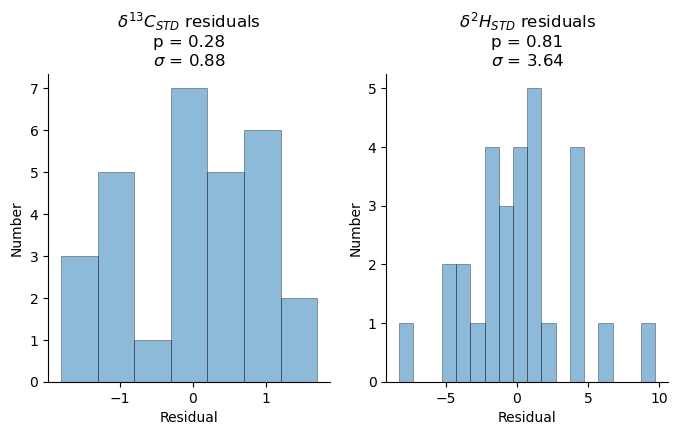

In [ ]:
import seaborn as sns
from scipy import stats

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
storeL = {}
storeRSE = {}
subLabels = ['$\delta^{13}C_{STD}$', '$\delta^{2}H_{STD}$']
subWidth = [0.5,1.0]
for subIdx, subKey in enumerate(['13C/Unsub','D/Unsub']):
    cAx = axes[subIdx]
    thisL = []
    thisRSE = []
    for MPAKey, MPAData in neg120k.items():
        thisSubData = MPAData[subKey]
        deltas = np.array(thisSubData['Deltas'])
        dev = deltas - deltas.mean()
        thisL += list(dev)
        thisRSE += thisSubData['DeltasErr']

    thisL = np.array(thisL)
    cAx.hist(thisL, facecolor = 'tab:blue', edgecolor = 'k', linewidth = 0.5, alpha = 0.5, bins=np. arange(min(thisL), max(thisL) + subWidth[subIdx], subWidth[subIdx]))
    
    print(len(thisL))
    #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/ Shapiro more appropriate than KS for small samples n < 50 (we have n = 30)
    shapiro_result = stats.shapiro(thisL)

    print("Shapiro-Wilk test statistic:", shapiro_result.statistic)
    print("p-value:", shapiro_result.pvalue)

    storeL[subKey] = copy.deepcopy(thisL)
    storeRSE[subKey] = copy.deepcopy(thisRSE)
    print(np.abs(np.array(thisL)).mean())

    cAx.set_title(subLabels[subIdx] + ' residuals\np = ' + f'{shapiro_result.pvalue:.2f}' + '\n$\sigma$ = ' +  f'{thisL.std():.2f}')

    cAx.set_ylabel("Number")
    cAx.set_xlabel("Residual")

sns.despine()

In [ ]:
np.array(storeRSE['D/Unsub']).mean()

3.863041205186848

In [ ]:
np.array(storeRSE['13C/Unsub']).mean()

0.8873298579793116

In [ ]:
neg120k['A']

{'13C/Unsub': {'Raw Ratios': [0.0101706462239838,
   0.010378080781841813,
   0.01016285688957146,
   0.010355807011876378,
   0.01017526871420479,
   0.010377655084814466,
   0.010161874442892104],
  'Raw RSE': [0.0006720800264374392,
   0.0006530505184142803,
   0.0006809744878050815,
   0.0006769898960269975,
   0.0006707409109234081,
   0.0007093778586635161,
   0.0007221363076104928],
  'Ratios': [1.020555393361028, 1.018504298452627, 1.0207926647370082],
  'RSEs': [0.000653070102839111, 0.0006770003915975757, 0.0007093958880506443],
  'Deltas': [20.555393361028074, 18.504298452626912, 20.79266473700825],
  'DeltasErr': [0.6530701028391109, 0.6770003915975757, 0.7093958880506444],
  'Delta Mean': 19.950785516887745,
  'ER': 1.0273973742002402},
 'D/Unsub': {'Raw Ratios': [0.000509904932710382,
   0.0005196423414788748,
   0.0005099124297956712,
   0.0005228999908382372,
   0.000507710971671014,
   0.0005198162489241365,
   0.0005062719140719308],
  'Raw RSE': [0.003097226688219215

In [ ]:
import orbiStandardize 

orbiStandardize.linearStandard(neg120k['A']['13C/Unsub']['Raw Ratios'], neg120k['A']['13C/Unsub']['Raw RSE'])

ModuleNotFoundError: No module named 'orbiStandardize'